In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Open data with wind
train = pd.read_csv('../../data/processed/train_with_wind.csv', sep=',')
test = pd.read_csv('../../data/processed/test_with_wind.csv', sep=',')

In [84]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dataset
0,2011-01-01 00:00:00,1,0,0,1,9.430000,14.015000,80.500000,6.672887,5.500000,22.500000,28.000000,1,1,1,0,train
1,2011-01-01 01:00:00,1,0,0,1,9.293333,13.888333,80.333333,6.623421,5.333333,24.000000,29.333333,1,1,1,1,train
2,2011-01-01 02:00:00,1,0,0,1,9.293333,13.888333,78.333333,6.189266,5.333333,23.000000,28.333333,1,1,1,2,train
3,2011-01-01 03:00:00,1,0,0,1,9.566667,14.141667,76.666667,7.451320,2.666667,12.666667,15.333333,1,1,1,3,train
4,2011-01-01 04:00:00,1,0,0,1,9.840000,13.890000,75.000000,7.277557,1.000000,4.000000,5.000000,1,1,1,4,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.306667,18.938333,52.333333,21.667800,13.333333,368.666667,382.000000,2,12,19,19,train
10882,2012-12-19 20:00:00,4,0,1,1,14.760000,17.676667,56.000000,18.668433,7.000000,241.333333,248.333333,2,12,19,20,train
10883,2012-12-19 21:00:00,4,0,1,1,14.213333,16.920000,59.666667,12.001933,8.666667,170.666667,179.333333,2,12,19,21,train
10884,2012-12-19 22:00:00,4,0,1,1,13.666667,16.666667,62.666667,10.000867,6.666667,121.666667,128.333333,2,12,19,22,train


In [76]:
# Create dummy variables to recoginse the datasets
train['dataset'] = 'train'
test['dataset'] = 'test'

# Combine train and test based on the datetime column
data = pd.concat([train, test], axis=0)
data.sort_values('datetime', inplace=True)

#reset_index
data.reset_index(drop=True, inplace=True)

In [77]:
mask = data['dataset'] == 'train'

In [78]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dataset
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.742676,3.0,13.0,16.0,1,1,1,0,train
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.742676,3.0,13.0,16.0,1,1,1,0,test
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.603097,8.0,32.0,40.0,1,1,1,1,test
3,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.603097,8.0,32.0,40.0,1,1,1,1,train
4,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.524488,5.0,27.0,32.0,1,1,1,2,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21767,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4.0,164.0,168.0,2,12,19,21,train
21768,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12.0,117.0,129.0,2,12,19,22,test
21769,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12.0,117.0,129.0,2,12,19,22,train
21770,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.998100,4.0,84.0,88.0,2,12,19,23,train


In [79]:
def smooth_data(data, features, window_sizes):
    for i, feature in enumerate(features):
        data[feature] = data[feature].rolling(window=window_sizes[i], min_periods=0, center = True).mean()
    return data

# Smooth data
features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
window_sizes = [3, 3, 3, 3, 3, 3, 3, 3, 3]
train = smooth_data(train, features, window_sizes)
test = smooth_data(test, features, window_sizes)

In [80]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dataset
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.742676,3.0,13.0,16.0,1,1,1,0,train
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.742676,3.0,13.0,16.0,1,1,1,0,test
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.603097,8.0,32.0,40.0,1,1,1,1,test
3,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.603097,8.0,32.0,40.0,1,1,1,1,train
4,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.524488,5.0,27.0,32.0,1,1,1,2,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21767,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4.0,164.0,168.0,2,12,19,21,train
21768,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12.0,117.0,129.0,2,12,19,22,test
21769,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12.0,117.0,129.0,2,12,19,22,train
21770,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.998100,4.0,84.0,88.0,2,12,19,23,train


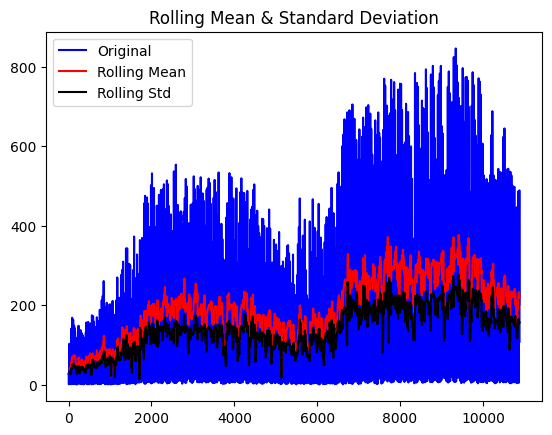

Results of Dickey-Fuller Test:
Test Statistic                -5.811382e+00
p-value                        4.393202e-07
#Lags Used                     3.900000e+01
Number of Observations Used    1.084600e+04
Critical Value (1%)           -3.430953e+00
Critical Value (5%)           -2.861807e+00
Critical Value (10%)          -2.566912e+00
dtype: float64
Time series is stationary


In [81]:
# check stationarity
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    # Print if the time series is stationary
    if dfoutput['Test Statistic'] < dfoutput['Critical Value (5%)']:
        print('Time series is stationary')
    else:
        print('Time series is not stationary')


test_stationarity(train['count'])

In [82]:
def remove_outliers(data, features):
    for feature in features:
        data = data[np.abs(data[feature] - data[feature].mean()) <= (3 * data[feature].std())]
    return data

# Remove outliers
features = ['count', 'registered']
train = remove_outliers(train, features)

In [83]:
def create_lagged_features(data, features, lags):
    for feature in features:
        for lag in lags:
            data[feature + '_lag_' + str(lag)] = data[feature].shift(lag)
    return data